# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    #https://api.openweathermap.org/data/2.5/weather?q=dukat&appid=f5f8ef000b613e56ba200e0bae02706f

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lipin bor
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | mogadishu
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | rayachoti
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | ulaanbaatar
Processing Record 18 of Set 1 | meulaboh
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | muroto
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | attawa

Processing Record 36 of Set 4 | dabakala
Processing Record 37 of Set 4 | teeli
Processing Record 38 of Set 4 | derzhavinsk
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | denpasar
Processing Record 41 of Set 4 | ishinomaki
Processing Record 42 of Set 4 | cherskiy
Processing Record 43 of Set 4 | kalmunai
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 47 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 48 of Set 4 | komsomolskiy
Processing Record 49 of Set 4 | zakupne
Processing Record 0 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 1 of Set 5 | wajir
Processing Record 2 of Set 5 | north bend
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | nome
Processing Record 5 of Set 5 | heinola
Processing Record 6 of Set 5 | mitsamiouli
Processing Record 7 of Set 5 | bluff
Process

Processing Record 24 of Set 8 | lagoa
Processing Record 25 of Set 8 | chikoy
City not found. Skipping...
Processing Record 26 of Set 8 | kawalu
Processing Record 27 of Set 8 | tenenkou
Processing Record 28 of Set 8 | clinton
Processing Record 29 of Set 8 | san remigio
Processing Record 30 of Set 8 | padang
Processing Record 31 of Set 8 | castanos
Processing Record 32 of Set 8 | jalu
Processing Record 33 of Set 8 | birao
Processing Record 34 of Set 8 | trujillo
Processing Record 35 of Set 8 | joshimath
Processing Record 36 of Set 8 | marsh harbour
Processing Record 37 of Set 8 | chihuahua
Processing Record 38 of Set 8 | nouadhibou
Processing Record 39 of Set 8 | ouallam
Processing Record 40 of Set 8 | lauria
Processing Record 41 of Set 8 | wigtown
Processing Record 42 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 43 of Set 8 | ust-omchug
Processing Record 44 of Set 8 | saleaula
City not found. Skipping...
Processing Record 45 of Set 8 | mys shmidta
City not found. 

Processing Record 10 of Set 12 | hearst
Processing Record 11 of Set 12 | del rio
Processing Record 12 of Set 12 | lowestoft
Processing Record 13 of Set 12 | sur
Processing Record 14 of Set 12 | rabo de peixe
Processing Record 15 of Set 12 | tupancireta
Processing Record 16 of Set 12 | las varas
Processing Record 17 of Set 12 | sisimiut
Processing Record 18 of Set 12 | jardim
Processing Record 19 of Set 12 | leshukonskoye
Processing Record 20 of Set 12 | san agustin
Processing Record 21 of Set 12 | bastia
Processing Record 22 of Set 12 | andilamena
Processing Record 23 of Set 12 | buckeye
Processing Record 24 of Set 12 | tezu
Processing Record 25 of Set 12 | sydney mines
Processing Record 26 of Set 12 | polunochnoye
Processing Record 27 of Set 12 | kutum
Processing Record 28 of Set 12 | methoni
Processing Record 29 of Set 12 | boda
Processing Record 30 of Set 12 | cody
Processing Record 31 of Set 12 | nyaunglebin
Processing Record 32 of Set 12 | mayor pablo lagerenza
Processing Record 3

In [4]:
#city_data

[{'City': 'Lipin Bor',
  'Lat': 60.2622,
  'Lng': 37.9763,
  'Max Temp': 0.43,
  'Humidity': 98,
  'Cloudiness': 70,
  'Wind Speed': 3.5,
  'Country': 'RU',
  'Date': 1681071222},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 24.67,
  'Humidity': 62,
  'Cloudiness': 1,
  'Wind Speed': 3.5,
  'Country': 'PF',
  'Date': 1681071222},
 {'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 11.38,
  'Humidity': 94,
  'Cloudiness': 98,
  'Wind Speed': 1.93,
  'Country': 'NZ',
  'Date': 1681071222},
 {'City': 'Mogadishu',
  'Lat': 2.0371,
  'Lng': 45.3438,
  'Max Temp': 28.45,
  'Humidity': 76,
  'Cloudiness': 1,
  'Wind Speed': 7.52,
  'Country': 'SO',
  'Date': 1681071223},
 {'City': 'Jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 14.18,
  'Humidity': 33,
  'Cloudiness': 0,
  'Wind Speed': 3.13,
  'Country': 'US',
  'Date': 1681071042},
 {'City': 'New Norfolk',
  'Lat': -42.7826,
  'Lng': 147.0587,
  'Max Temp': 10.72,
  'Humidity'

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [23]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lipin Bor,60.2622,37.9763,0.43,98,70,3.50,RU,1681071222
1,Rikitea,-23.1203,-134.9692,24.67,62,1,3.50,PF,1681071222
2,Mataura,-46.1927,168.8643,11.38,94,98,1.93,NZ,1681071222
3,Mogadishu,2.0371,45.3438,28.45,76,1,7.52,SO,1681071223
4,Jamestown,42.0970,-79.2353,14.18,33,0,3.13,US,1681071042
5,New Norfolk,-42.7826,147.0587,10.72,67,100,1.79,AU,1681070979
6,Souillac,-20.5167,57.5167,24.21,94,75,2.06,MU,1681071223
7,Bethel,41.3712,-73.4140,14.75,27,0,1.54,US,1681071223
8,Carnarvon,-24.8667,113.6333,21.65,65,23,4.86,AU,1681071072
9,Qaanaaq,77.4840,-69.3632,-20.93,73,0,2.28,GL,1681071224


In [24]:
# convert unix timestamp to date,time
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")

In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Lipin Bor,60.2622,37.9763,0.43,98,70,3.50,RU,2023-04-09 20:13:42
1,Rikitea,-23.1203,-134.9692,24.67,62,1,3.50,PF,2023-04-09 20:13:42
2,Mataura,-46.1927,168.8643,11.38,94,98,1.93,NZ,2023-04-09 20:13:42
3,Mogadishu,2.0371,45.3438,28.45,76,1,7.52,SO,2023-04-09 20:13:43
4,Jamestown,42.0970,-79.2353,14.18,33,0,3.13,US,2023-04-09 20:10:42


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

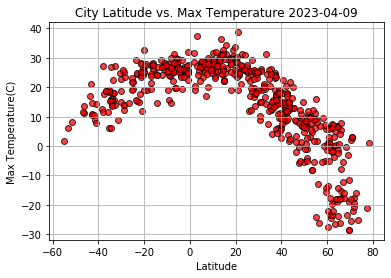

In [38]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Max Temperature 2023-04-09")
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

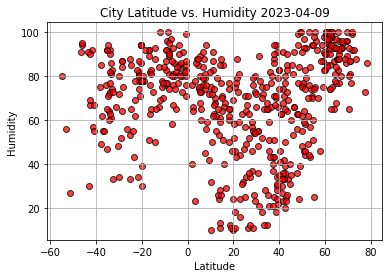

In [39]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Humidity 2023-04-09")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

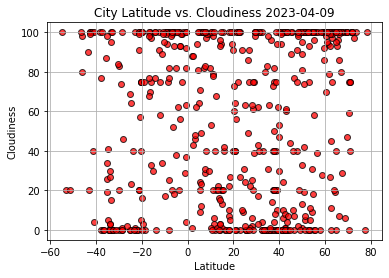

In [40]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Cloudiness 2023-04-09")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

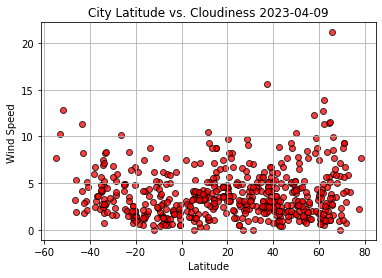

In [41]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Cloudiness 2023-04-09")
plt.ylabel('Wind Speed ')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE